In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options
# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

qiskit_runtime_service.__init__:INFO:2024-02-27 14:12:07,745: Default instance: ibm-q/open/main


In [2]:
# Importing the datetime module for working with dates and times
import datetime

# Importing the NumPy library and aliasing it as np for numerical operations
import numpy as np

# Importing the Matplotlib library and its pyplot module for data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt

# Updating Matplotlib settings to enable LaTeX in text rendering
plt.rcParams.update({"text.usetex": True})

# Setting the default figure size for Matplotlib plots
plt.rcParams["figure.figsize"] = (6, 4)

# Setting the dots per inch (DPI) for Matplotlib figures
mpl.rcParams["figure.dpi"] = 200

# Importing specific modules from Qiskit IBM Runtime and Quantum Information libraries
from qiskit_ibm_runtime import Estimator, Session, QiskitRuntimeService, Options
from qiskit.quantum_info import SparsePauliOp
from qiskit import QuantumCircuit

# Creating an instance of the QiskitRuntimeService class
service = QiskitRuntimeService()

qiskit_runtime_service.__init__:INFO:2024-02-27 14:12:11,683: Default instance: ibm-q/open/main


Trotter circuit with 1 Trotter steps


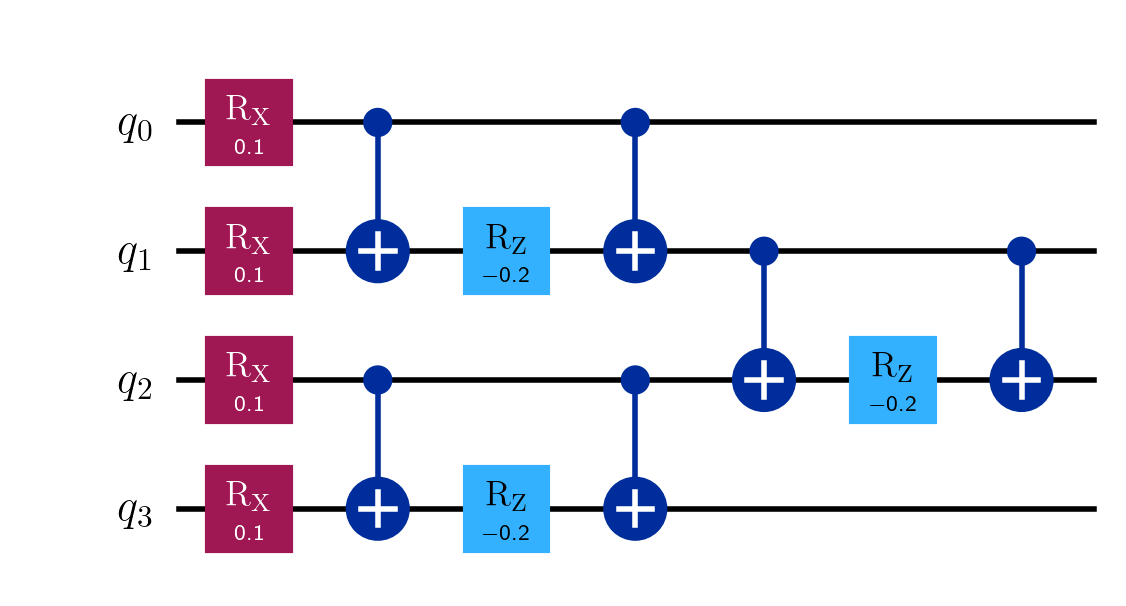

Trotter circuit with 2 Trotter steps


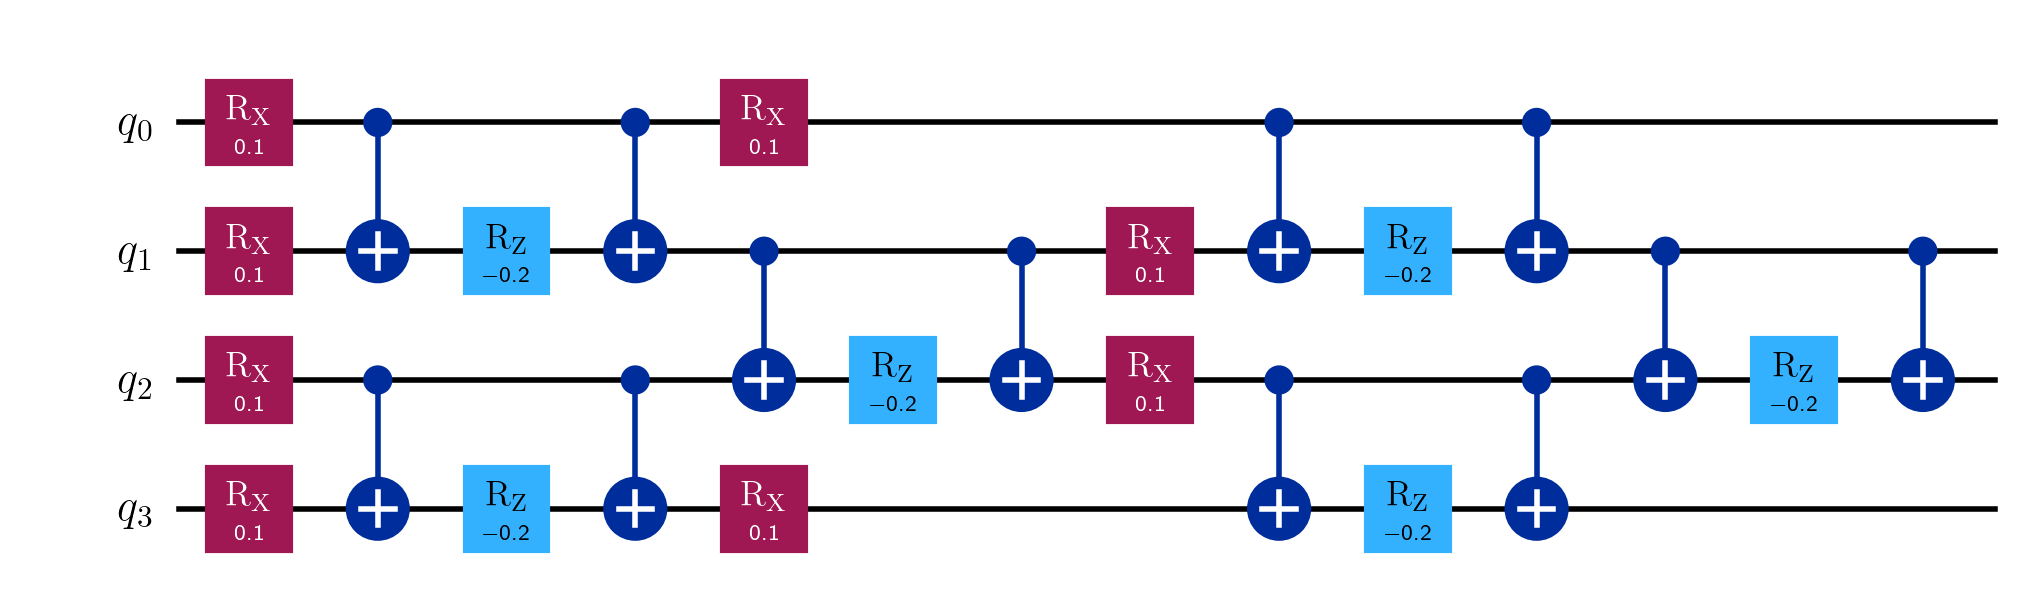

Trotter circuit with 3 Trotter steps


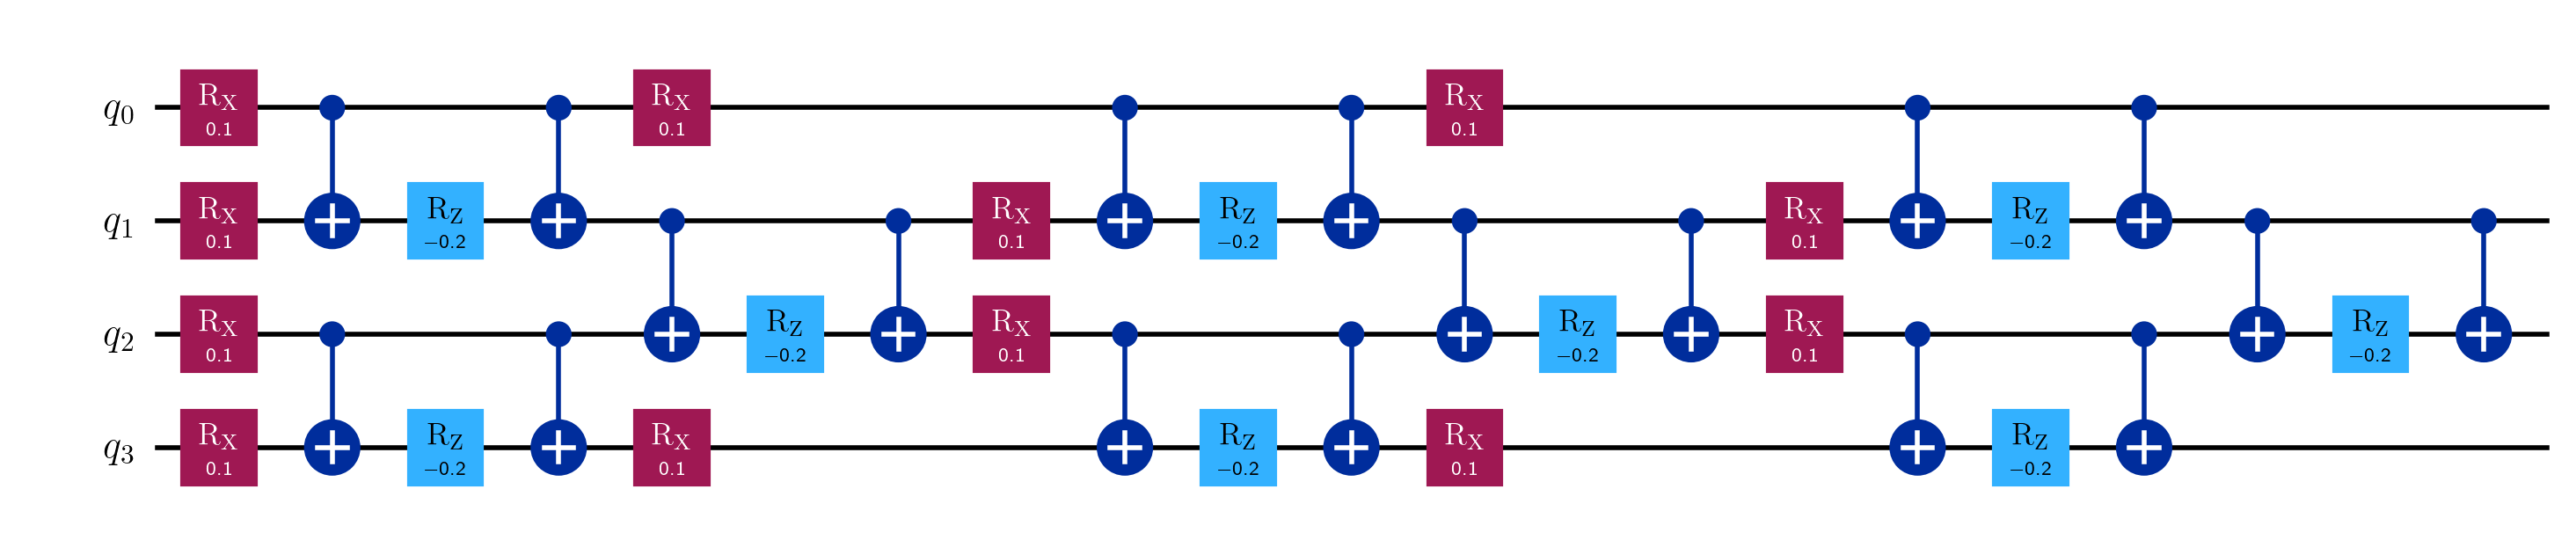

Trotter circuit with 4 Trotter steps


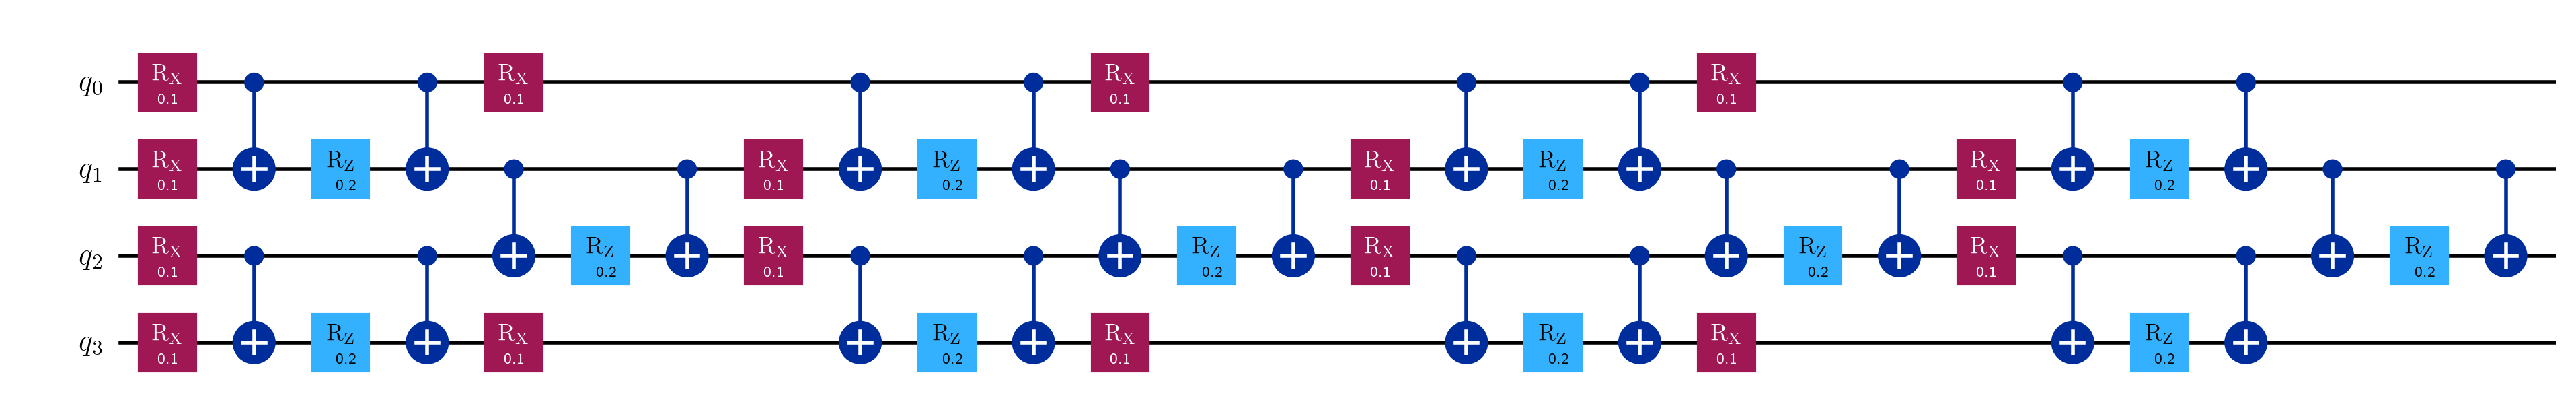

Trotter circuit with 5 Trotter steps


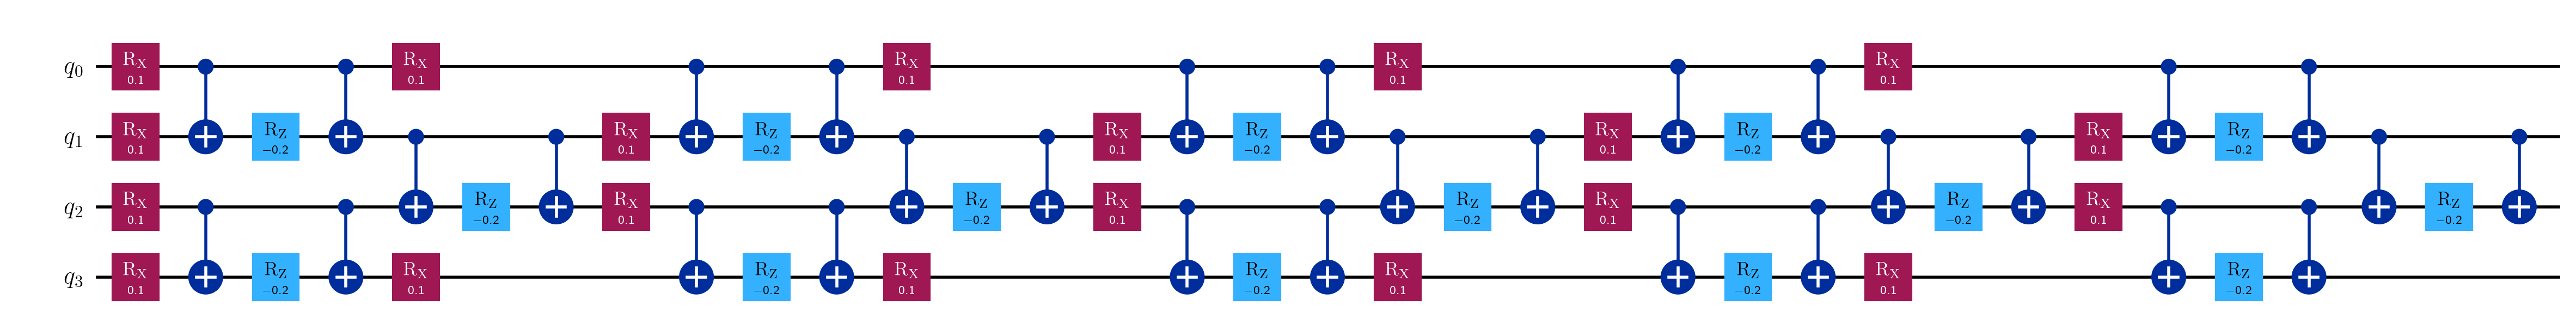

In [3]:
# Defining the backend for quantum simulation as the IBM QASM simulator
backend_simulator = "ibmq_qasm_simulator"

# Defining the target quantum hardware device backend as "ibm_nairobi"
backend = "ibm_nairobi"

# Setting the number of qubits and creating a quantum circuit for a Trotter layer
qubits = 4
trotter_layer = QuantumCircuit(qubits)
#Single-qubit rotation about the X axis.
#rx(theta, qubit, label=None)
trotter_layer.rx(0.1, range(qubits))
#Controlled-X gate.
#flips the target qubit if the control qubit is in the |1>state.
#cx(control_qubit, target_qubit, label=None, ctrl_state=None)
trotter_layer.cx(0, 1)
trotter_layer.cx(2, 3)
#Single-qubit rotation about the Z axis.
#rz(phi, qubit)
trotter_layer.rz(-0.2, [1, 3])
trotter_layer.cx(0, 1)
trotter_layer.cx(2, 3)
trotter_layer.cx(1, 2)
trotter_layer.rz(-0.2, 2)
trotter_layer.cx(1, 2)

# Setting the number of Trotter steps in the simulation
num_steps = 6
trotter_circuit_list = []

# Generating Trotter circuits with increasing Trotter steps and displaying them
for i in range(1, num_steps):
    trotter_circuit = QuantumCircuit(qubits)
    for _ in range(i):
        trotter_circuit = trotter_circuit.compose(trotter_layer)
    trotter_circuit_list.append(trotter_circuit)
    print(f"Trotter circuit with {i} Trotter steps")
    display(trotter_circuit.draw(fold=-1))

# Creating a SparsePauliOp representing the Z operator on all qubits
obs = SparsePauliOp("Z" * qubits)
obs_list = [obs] * len(trotter_circuit_list)


In [4]:
# Setting up options for the quantum simulation run
options = Options()
# Setting the number of shots for the simulation to 1000
options.execution.shots = 1000
# Setting the optimization level to 0 for no optimization
options.optimization_level = 0  
# Setting the resilience level to 0 for no mitigation
options.resilience_level = 0  
# Establishing a session with the IBM Quantum Runtime service using the QASM simulator backend
with Session(service=service, backend=backend_simulator) as session:
    # Creating an Estimator object for the simulation with specified options
    estimator_sim = Estimator(session=session, options=options)
    # Running the quantum circuits on the simulator and obtaining a job
    job_sim = estimator_sim.run(circuits=trotter_circuit_list, observables=obs_list)
    # Printing the job ID for reference
    print("job id:", job_sim.job_id)
    # Printing the result of the simulation
    print(job_sim.result())
# Extracting expectation values from the simulation result
expvals_ideal = job_sim.result().values
# Calculating the variance and standard error for the expectation values
expvals_ideal_variance = [
    metadata["variance"] / metadata["shots"] for metadata in job_sim.result().metadata
]
std_error_ideal = np.sqrt(expvals_ideal_variance)

base_primitive._run_primitive:INFO:2024-02-27 14:12:29,825: Submitting job using options {'optimization_level': 0, 'resilience_level': 0, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 0}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 0}, 'execution': {'shots': 1000, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


job id: <bound method JobV1.job_id of <RuntimeJob('cneurjjpmlh18veulalg', 'estimator')>>
EstimatorResult(values=array([0.97 , 0.904, 0.858, 0.732, 0.634]), metadata=[{'variance': 0.05910000000000004, 'shots': 1000}, {'variance': 0.18278399999999995, 'shots': 1000}, {'variance': 0.26383600000000007, 'shots': 1000}, {'variance': 0.46417600000000003, 'shots': 1000}, {'variance': 0.598044, 'shots': 1000}])


base_websocket_client.stream:INFO:2024-02-27 14:39:15,131: A websocket error occurred while streaming for job cqez21gxdecg008w9j30. Connection closed with 1006.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/websocket/_app.py", line 500, in setSock
    dispatcher.read(self.sock.sock, read, check)
  File "/opt/conda/lib/python3.10/site-packages/websocket/_app.py", line 112, in read
    if not read_callback():
  File "/opt/conda/lib/python3.10/site-packages/websocket/_app.py", line 523, in read
    raise e
  File "/opt/conda/lib/python3.10/site-packages/websocket/_app.py", line 515, in read
    op_code, frame = self.sock.recv_data_frame(True)
  File "/opt/conda/lib/python3.10/site-packages/websocket/_core.py", line 437, in recv_data_frame
    frame = self.recv_frame()
  File "/opt/conda/lib/python3.10/site-packages/websocket/_core.py", line 478, in recv_frame
    return self.frame_buffer.recv_frame()
  File "/opt/conda/lib/python3.10/site-packages/webs

In [6]:
# Setting up options for the quantum run on the real backend
options = Options()

# Setting the number of shots for the run to 1000
options.execution.shots = 1000

# Setting the optimization level to 0 for no optimization
options.optimization_level = 0  

# Setting the resilience level to 0 for no error mitigation
options.resilience_level = 0  

# Specifying the target quantum hardware device backend as "ibm_nairobi"
backend = "ibm_osaka"

# Establishing a session with the IBM Quantum Runtime service using the specified real backend
with Session(service=service, backend=backend) as session:
    
    # Creating an Estimator object for the real backend with specified options
    estimator = Estimator(session=session, options=options)
    
    # Running the quantum circuits on the real backend and obtaining a job
    job = estimator.run(circuits=trotter_circuit_list, observables=obs_list)
    
    # Printing the job ID for reference
    print("job id:", job.job_id)
    
    # Printing the result of the run on the real backend
    print(job.result())

# Extracting expectation values from the real backend run result
expvals_unmit = job.result().values

# Calculating the variance and standard error for the expectation values
expvals_unmit_variance = [
    metadata["variance"] / metadata["shots"] for metadata in job.result().metadata
]
std_error_unmit = np.sqrt(expvals_unmit_variance)


base_primitive._run_primitive:INFO:2024-02-27 14:26:13,619: Submitting job using options {'optimization_level': 0, 'resilience_level': 0, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 0}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 0}, 'execution': {'shots': 1000, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}
/opt/conda/lib/python3.10/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:935: UserWarning: Starting a session using the /jobs endpoint will no longer be supported after March 31, 2024. Please update your code as soon as possible before this date. If you are using qiskit-ibm-runtime, you will need version 0.20.0 or higher. If you are using qiskit-ibm-provider, you will need version 0.10.0 or higher. If you are calling the API directly, please use the /sessions endpoint instead.
  warnings.warn(warning_message)


job id: <bound method JobV1.job_id of <RuntimeJob('cqez21gxdecg008w9j30', 'estimator')>>
EstimatorResult(values=array([0.628, 0.358, 0.166, 0.05 , 0.044]), metadata=[{'variance': 0.6056159999999999, 'shots': 1000, 'warning': 'Circuits that do not match the target hardware definition will no longer be supported after March 1, 2024. See the transpilation documentation (https://docs.quantum.ibm.com/transpile) for instructions to transform circuits and the primitive examples (https://docs.quantum.ibm.com/run/primitives-examples) to see this coupled with operator transformations.'}, {'variance': 0.871836, 'shots': 1000, 'warning': 'Circuits that do not match the target hardware definition will no longer be supported after March 1, 2024. See the transpilation documentation (https://docs.quantum.ibm.com/transpile) for instructions to transform circuits and the primitive examples (https://docs.quantum.ibm.com/run/primitives-examples) to see this coupled with operator transformations.'}, {'vari

## Dynamical Decoupling (DD), sends pulses to idle qubits to reset their value to their original states, undoing the potentially harmful effects of nearby qubits that are being used for the calculation.
# Reference: Lorenza Viola, and Seth Lloyd , Dynamical suppression of decoherence in two-state quantum systems, arXiv:quant-ph/9803057

In [7]:
# Setting up options for the quantum run on the real backend with dynamical decoupling
options = Options()

# Setting the number of shots for the run to 1000
options.execution.shots = 1000

# Setting the optimization level to 3 for dynamical decoupling
options.optimization_level = 3  

# Setting the resilience level to 0 for no error mitigation
options.resilience_level = 0  

# Establishing a session with the IBM Quantum Runtime service using the specified real backend
with Session(service=service, backend=backend) as session:
    
    # Creating an Estimator object for the real backend with specified options
    estimator = Estimator(session=session, options=options)
    
    # Running the quantum circuits on the real backend with dynamical decoupling and obtaining a job
    job_dd = estimator.run(circuits=trotter_circuit_list, observables=obs_list)
    
    # Printing the job ID for reference
    print("job id:", job_dd.job_id)
    
    # Printing the result of the run on the real backend with dynamical decoupling
    print(job_dd.result())

# Extracting expectation values from the real backend run result with dynamical decoupling
expvals_unmit_dd = job_dd.result().values

# Calculating the variance and standard error for the expectation values with dynamical decoupling
expvals_unmit_dd_variance = [
    metadata["variance"] / metadata["shots"] for metadata in job_dd.result().metadata
]
std_error_dd = np.sqrt(expvals_unmit_dd_variance)


base_primitive._run_primitive:INFO:2024-02-27 15:26:53,772: Submitting job using options {'optimization_level': 3, 'resilience_level': 0, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 0}, 'execution': {'shots': 1000, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


job id: <bound method JobV1.job_id of <RuntimeJob('cqezyfhxftxg0089bsyg', 'estimator')>>
EstimatorResult(values=array([0.686, 0.508, 0.354, 0.21 , 0.136]), metadata=[{'variance': 0.529404, 'shots': 1000, 'warning': 'Circuits that do not match the target hardware definition will no longer be supported after March 1, 2024. See the transpilation documentation (https://docs.quantum.ibm.com/transpile) for instructions to transform circuits and the primitive examples (https://docs.quantum.ibm.com/run/primitives-examples) to see this coupled with operator transformations.\nOptimization level clipped from 3 to 1'}, {'variance': 0.7419359999999999, 'shots': 1000, 'warning': 'Circuits that do not match the target hardware definition will no longer be supported after March 1, 2024. See the transpilation documentation (https://docs.quantum.ibm.com/transpile) for instructions to transform circuits and the primitive examples (https://docs.quantum.ibm.com/run/primitives-examples) to see this coupled 

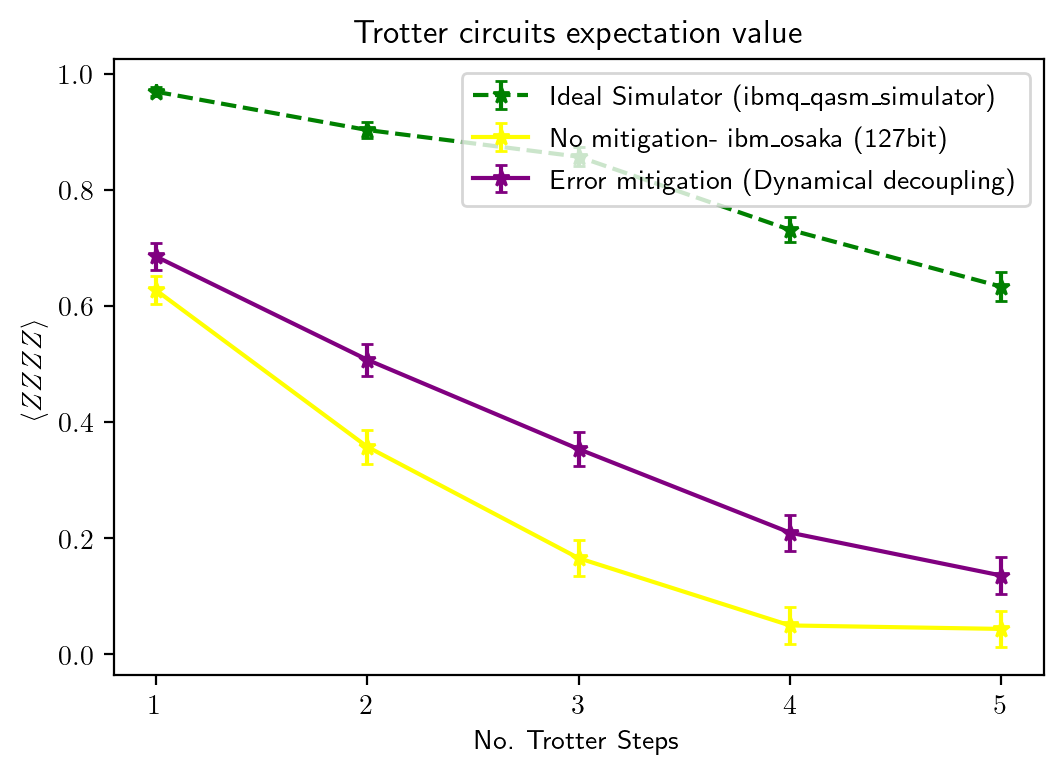

In [8]:
plt.title("Trotter circuits expectation value")
plt.errorbar(
    range(1, num_steps),
    expvals_ideal,
    std_error_ideal,
    fmt="*",
    linestyle="--",
    capsize=2,
    c="green",
    label="Ideal Simulator (ibmq_qasm_simulator)",
)
plt.errorbar(
    range(1, num_steps),
    expvals_unmit,
    std_error_unmit,
    fmt="*",
    linestyle="-",
    capsize=2,
    c="yellow",
    label="No mitigation- ibm_osaka (127bit)",
)
plt.errorbar(
    range(1, num_steps),
    expvals_unmit_dd,
    std_error_dd,
    fmt="*",
    linestyle="-",
    capsize=2,
    c="purple",
    label="Error mitigation (Dynamical decoupling)",
)

plt.ylabel(f"$\langle ZZZZ \\rangle$")
plt.xlabel("No. Trotter Steps")
plt.xticks([1, 2, 3, 4, 5])
plt.legend()
plt.show()

# Twirled readout error extinction
Twirled readout error extinction (T-REx) uses a technique known as Pauli twirling to reduce the noise introduced during the process of quantum measurement. This technique assumes no specific form of noise, which makes it very general and effective.

Overall workflow
1. Acquire data for the zero state with randomized bit flips (Pauli X before measurement)
2. Acquire data for the desired (noisy) state with randomized bit flips (Pauli X before measurement)
3. Compute the special function for each data set, and divide.
# Reference: E. van den Berg, Z. Minev, and K. Temme, Model-free readout-error mitigation for quantum expectation values arXiv:2012.09738

In [10]:
options = Options()
options.resilience_level = 1  # T-REx
options.optimization_level = 0  # No optimization
options.execution.shots = 1000

with Session(service=service, backend=backend) as session:
    estimator = Estimator(session=session, options=options)
    job_trex = estimator.run(circuits=trotter_circuit_list, observables=obs_list)
    print("job id:", job_trex.job_id)
    print(job_trex.result())

expvals_unmit_trex = job_trex.result().values
expvals_unmit_trex_variance = [
    metadata["variance"] / metadata["shots"] for metadata in job_trex.result().metadata
]
std_error_trex = np.sqrt(expvals_unmit_trex_variance)

base_primitive._run_primitive:INFO:2024-02-27 16:44:21,935: Submitting job using options {'optimization_level': 0, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 0}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 1000, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}
/opt/conda/lib/python3.10/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:935: UserWarning: Starting a session using the /jobs endpoint will no longer be supported after March 31, 2024. Please update your code as soon as possible before this date. If you are using qiskit-ibm-runtime, you will need version 0.20.0 or higher. If you are using qiskit-ibm-provider, you will need version 0.10.0 or higher. If you are calling the API directly, please use the /sessions endpoint instead.
  warnings.warn(warning_message)


job id: <bound method JobV1.job_id of <RuntimeJob('cqf12sk3ptq000872vp0', 'estimator')>>
EstimatorResult(values=array([ 0.7944571 ,  0.47043381,  0.16801208,  0.06480466, -0.0960069 ]), metadata=[{'variance': 0.8321804216365531, 'shots': 1008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192, 'warning': 'Circuits that do not match the target hardware definition will no longer be supported after March 1, 2024. See the transpilation documentation (https://docs.quantum.ibm.com/transpile) for instructions to transform circuits and the primitive examples (https://docs.quantum.ibm.com/run/primitives-examples) to see this coupled with operator transformations.'}, {'variance': 1.242034536048187, 'shots': 1008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192, 'warning': 'Circuits that do not match the target hardware definition will no longer be supported after March 1, 2024. See the transpilation documentati

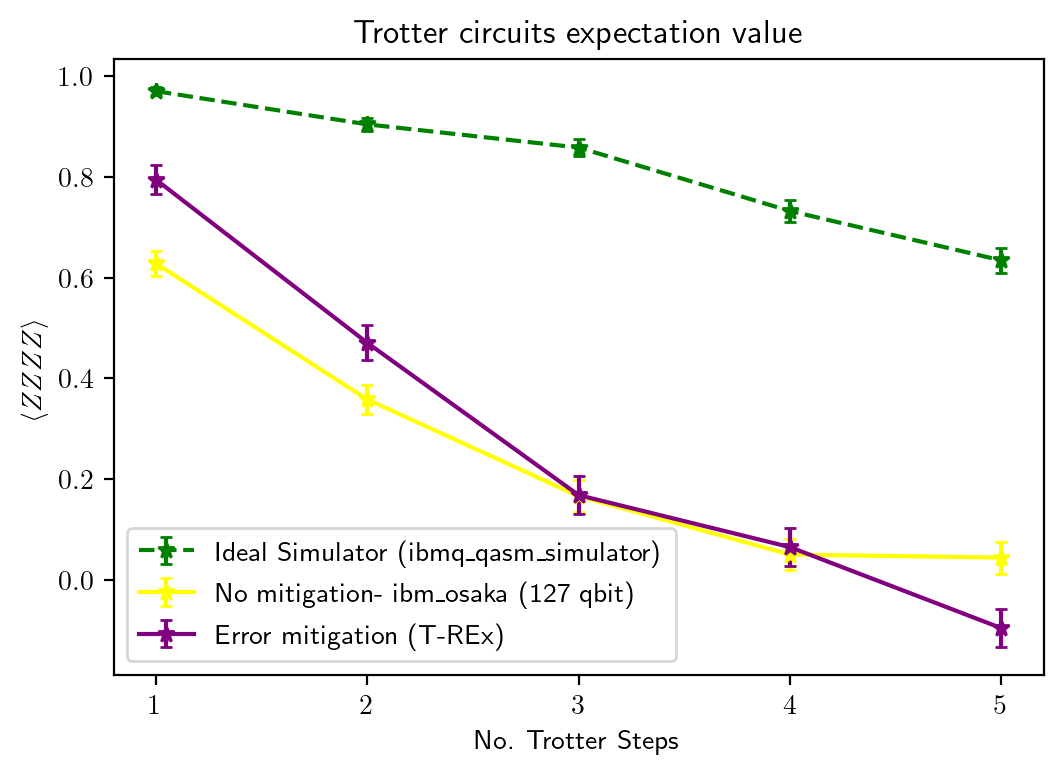

In [11]:
plt.title("Trotter circuits expectation value")
plt.errorbar(
    range(1, num_steps),
    expvals_ideal,
    std_error_ideal,
    fmt="*",
    linestyle="--",
    capsize=2,
    c="green",
    label="Ideal Simulator (ibmq_qasm_simulator)",
)
plt.errorbar(
    range(1, num_steps),
    expvals_unmit,
    std_error_unmit,
    fmt="*",
    linestyle="-",
    capsize=2,
    c="yellow",
    label="No mitigation- ibm_osaka (127 qbit)",
)
plt.errorbar(
    range(1, num_steps),
    expvals_unmit_trex,
    std_error_trex,
    fmt="*",
    linestyle="-",
    capsize=2,
    c="purple",
    label="Error mitigation (T-REx)",
)

plt.ylabel(f"$\langle ZZZZ \\rangle$")
plt.xlabel("No. Trotter Steps")
plt.xticks([1, 2, 3, 4, 5])
plt.legend()
plt.show()

In [12]:
options = Options()
options.execution.shots = 1000
options.optimization_level = 0  # No optimization
options.resilience_level = 2  # ZNE

with Session(service=service, backend=backend) as session:
    estimator = Estimator(session=session, options=options)
    job_zne = estimator.run(circuits=trotter_circuit_list, observables=obs_list)
    print("job id:", job_zne.job_id)
    print(job_zne.result())

expvals_unmit_zne = job_zne.result().values
# Standard error: coming soon!

base_primitive._run_primitive:INFO:2024-02-27 17:30:09,690: Submitting job using options {'optimization_level': 0, 'resilience_level': 2, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 0}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator', 'level': 2}, 'execution': {'shots': 1000, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}
/opt/conda/lib/python3.10/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:935: UserWarning: Starting a session using the /jobs endpoint will no longer be supported after March 31, 2024. Please update your code as soon as possible before this date. If you are using qiskit-ibm-runtime, you will need version 0.20.0 or higher. If you are using qiskit-ibm-provider, you will need version 0.10.0 or higher. If you are calling the API directly, please use the /s

job id: <bound method JobV1.job_id of <RuntimeJob('cqf1r8hfejeg008tqq50', 'estimator')>>
EstimatorResult(values=array([0.75864867, 0.46256095, 0.16837186, 0.07897471, 0.01318555]), metadata=[{'std_error': 0.9297848799586436, 'zne': {'noise_amplification': {'noise_amplifier': "<TwoQubitAmplifier:{'barriers': True, 'noise_factor_relative_tolerance': 0.01, 'random_seed': None, 'sub_folding_option': 'from_first'}>", 'noise_factors': [1, 3, 5], 'values': [0.668, 0.576, 0.362], 'variance': [0.5537759999999999, 0.668224, 0.8689560000000001], 'shots': [1000, 1000, 1000]}, 'extrapolation': {'extrapolator': 'LinearExtrapolator', 'coefficients': [0.758648669344291, -0.0741528658532179], 'covariance_matrix': [[0.8644999229997092, -0.23650281859285252], [-0.23650281859285252, 0.08740482862122295]], 'residuals': [-0.016495803491073047, 0.03980992821536267, -0.025884340078201507], 'R2': 0.948742204415013}}, 'warning': 'Circuits that do not match the target hardware definition will no longer be suppor

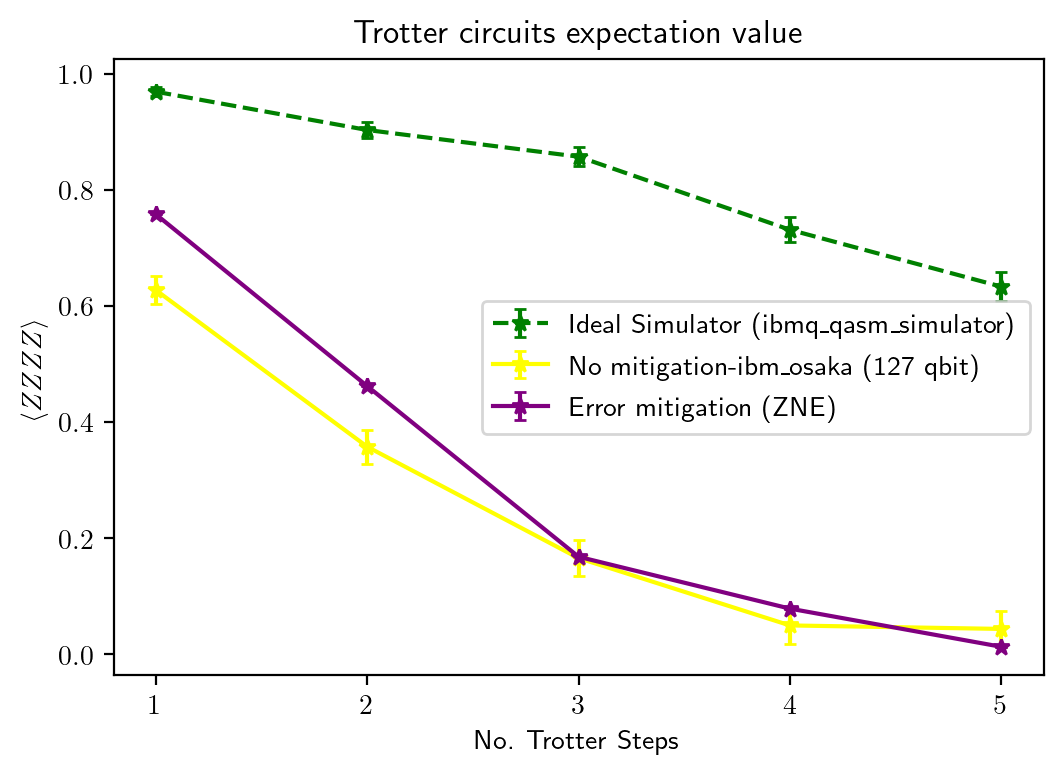

In [13]:
plt.title("Trotter circuits expectation value")
plt.errorbar(
    range(1, num_steps),
    expvals_ideal,
    std_error_ideal,
    fmt="*",
    linestyle="--",
    capsize=2,
    c="green",
    label="Ideal Simulator (ibmq_qasm_simulator)",
)
plt.errorbar(
    range(1, num_steps),
    expvals_unmit,
    std_error_unmit,
    fmt="*",
    linestyle="-",
    capsize=2,
    c="yellow",
    label="No mitigation-ibm_osaka (127 qbit)",
)
plt.errorbar(
    range(1, num_steps),
    expvals_unmit_zne,
    [0] * (num_steps - 1),
    fmt="*",
    linestyle="-",
    capsize=2,
    c="purple",
    label="Error mitigation (ZNE)",
)

plt.xlabel("No. Trotter Steps")
plt.ylabel(f"$\langle ZZZZ \\rangle$")
plt.xticks([1, 2, 3, 4, 5])
plt.legend()
plt.show()

In [14]:
def interim_results_callback(job_id, result):
    now = datetime.datetime.now()
    print(now, "*** Callback ***", result, "\n")


options = Options()
options.optimization_level = 0  # No optimization
options.execution.shots = 100
options.resilience_level = 3  # PEC
options.environment.callback = interim_results_callback

with Session(service=service, backend=backend) as session:
    estimator_pec = Estimator(session=session, options=options)
    job_pec = estimator_pec.run(circuits=trotter_circuit_list, observables=obs_list)
    print("job id:", job_pec.job_id)

expvals_pec = job_pec.result().values
std_error_pec = [metadata["standard_error"] for metadata in job_pec.result().metadata]

base_primitive._run_primitive:INFO:2024-02-27 17:35:00,321: Submitting job using options {'optimization_level': 0, 'resilience_level': 3, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 0}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 3}, 'execution': {'shots': 100, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'callback': <function interim_results_callback at 0x7fdcd1cedcf0>, 'job_tags': []}, 'simulator': {}}
/opt/conda/lib/python3.10/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:935: UserWarning: Starting a session using the /jobs endpoint will no longer be supported after March 31, 2024. Please update your code as soon as possible before this date. If you are using qiskit-ibm-runtime, you will need version 0.20.0 or higher. If you are using qiskit-ibm-provider, you will need version 0.10.0 or higher. If you are calling the API directly, please use the /s

job id: <bound method JobV1.job_id of <RuntimeJob('cqf1thafejeg008tqqjg', 'estimator')>>


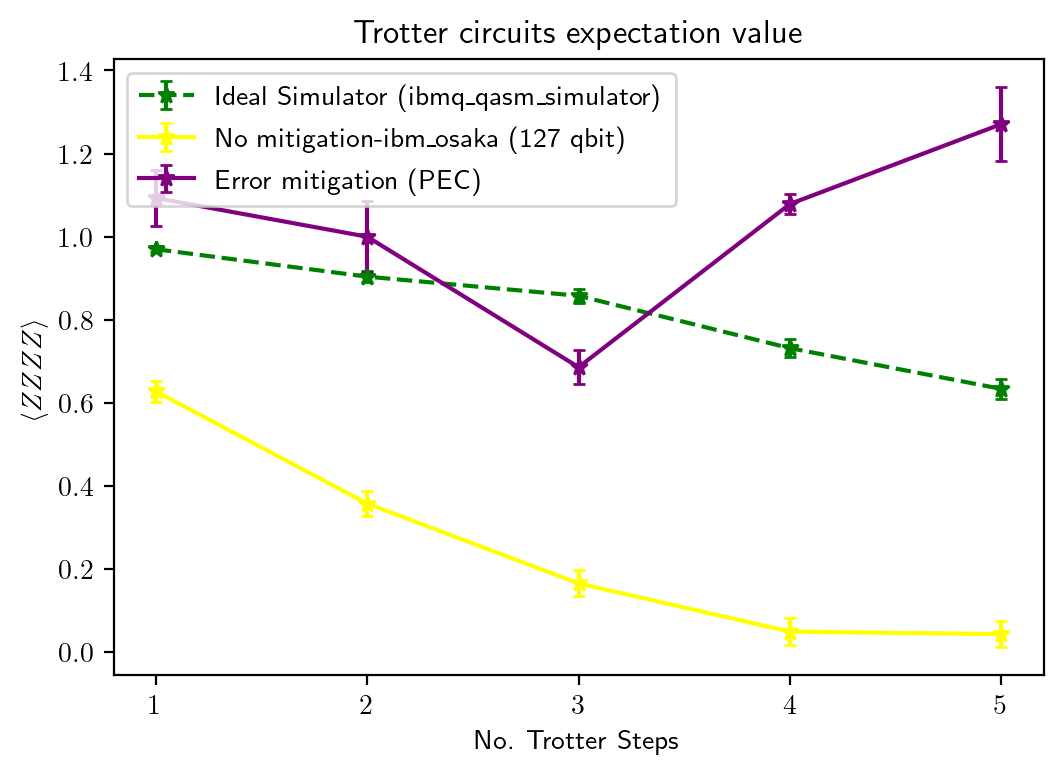

In [15]:
plt.title("Trotter circuits expectation value")
plt.errorbar(
    range(1, num_steps),
    expvals_ideal,
    std_error_ideal,
    fmt="*",
    linestyle="--",
    capsize=2,
    c="green",
    label="Ideal Simulator (ibmq_qasm_simulator)",
)
plt.errorbar(
    range(1, num_steps),
    expvals_unmit,
    std_error_unmit,
    fmt="*",
    linestyle="-",
    capsize=2,
    c="yellow",
    label="No mitigation-ibm_osaka (127 qbit)",
)
plt.errorbar(
    range(1, num_steps),
    expvals_pec,
    std_error_pec,
    fmt="*",
    linestyle="-",
    capsize=2,
    c="purple",
    label="Error mitigation (PEC)",
)

plt.ylabel(f"$\langle ZZZZ \\rangle$")
plt.xlabel("No. Trotter Steps")
plt.xticks([1, 2, 3, 4, 5])
plt.legend()
plt.show()